In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import glob
import shutil

In [0]:
#shutil.copy("drive/My Drive/weather_turkey_processed.zip","./")
#!unzip weather_turkey_processed.zip

In [224]:
shutil.copy("drive/My Drive/RealTimeConsumption-01122014-09032020.csv","./")

'./RealTimeConsumption-01122014-09032020.csv'

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%matplotlib inline
from tqdm import tqdm_notebook as tqdm

In [226]:
consumption_df=pd.read_csv("RealTimeConsumption-01122014-09032020.csv",encoding='latin-1')
consumption_df.columns=["Date","Hour","Consumption"]

consumption_df["Datetime"]=consumption_df["Date"]+" "+consumption_df["Hour"]
consumption_df["Consumption"]=consumption_df["Consumption"].apply(lambda x:x.replace(",","")).astype(float)
consumption_df["Datetime"]=pd.to_datetime(consumption_df["Datetime"],format="%d.%m.%Y %H:%M")
consumption_df=consumption_df.loc[consumption_df["Datetime"]<pd.to_datetime("2020-03-04 00:00:00")]
consumption_df#.loc[consumption_df["Date"]=="06.03.2019"]

Date   Hour  Consumption            Datetime
0      31.12.2015  00:00     29590.88 2015-12-31 00:00:00
1      31.12.2015  01:00     27785.43 2015-12-31 01:00:00
2      31.12.2015  02:00     26516.53 2015-12-31 02:00:00
3      31.12.2015  03:00     26091.62 2015-12-31 03:00:00
4      31.12.2015  04:00     25871.54 2015-12-31 04:00:00
...           ...    ...          ...                 ...
36571  03.03.2020  19:00     37936.79 2020-03-03 19:00:00
36572  03.03.2020  20:00     37553.37 2020-03-03 20:00:00
36573  03.03.2020  21:00     36581.73 2020-03-03 21:00:00
36574  03.03.2020  22:00     35434.36 2020-03-03 22:00:00
36575  03.03.2020  23:00     33827.00 2020-03-03 23:00:00

[36576 rows x 4 columns]

In [0]:
from sklearn.metrics import mean_squared_error,mean_squared_log_error,mean_absolute_error
exp_eval_df=[]
def eval_function(name_,y_true, y_pred):
    print("RMSE: ",np.sqrt(mean_squared_error(y_true,y_pred)))
    #print("RMSLE: ",np.sqrt(mean_squared_log_error(y_true,y_pred)))
    print("MAE: ",mean_absolute_error(y_true,y_pred))
    print("MAPE: ",np.mean(np.abs((y_true - y_pred) / y_true)) * 100 )
    return name_, np.sqrt(mean_squared_error(y_true,y_pred)),mean_absolute_error(y_true,y_pred), np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [0]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def enhanced_eval_function(name_,y_true, y_pred,valid_df):
    """
    docstring denir buraya func paramlarının neler oldugunu yazarsınız
    name_:kullanılan modelin ismi
    y_true:actual values
    y_pred:predicted values
    valid_df:modele verdiginiz sekliyle validation dataframe'i ve yanına datetime'ı
    """
    rmse_=np.sqrt(mean_squared_error(y_true,y_pred))
    rmsle_=np.sqrt(mean_squared_log_error(y_true,y_pred))
    mae_=mean_absolute_error(y_true,y_pred)
    mape_=mean_absolute_percentage_error(y_true, y_pred)
    GMAPE= ((np.abs((y_true - y_pred)/ y_true)*100)*(y_true/y_true.sum())).sum()

    print("RMSE: ",rmse_)
    print("RMSLE: ",rmsle_)
    print("MAE: ",mae_)
    print("MAPE: ",mape_)
    print("GMAPE: ",GMAPE)

    sns.scatterplot(x=y_true,y=np.sqrt(np.square(y_true-y_pred)))
    plt.xlabel('true')
    plt.ylabel('error')
    plt.pause(0.01)
    
    sns.scatterplot(x=y_true,y=np.abs((y_true - y_pred) / y_true)*100)
    plt.xlabel('true')
    plt.ylabel('percent absolute error')
    plt.pause(0.01)

    
    # nchunks=13
    # fig,ax=plt.subplots(nrows=nchunks,figsize=(25,100))
    # valid_copy=valid_df.reset_index(drop=True).copy()
    # sns.scatterplot(x=datetime_,y=((np.abs((y_true - y_pred)) / y_true)*100)[datetime_.index.tolist()],ax=ax[i])
    # for i,datetime_ in enumerate(np.array_split(valid_copy["Datetime"],nchunks)):
    #     plt.sca(ax[i])
    #     sns.scatterplot(x=datetime_,y=((np.abs((y_true - y_pred)) / y_true)*100)[datetime_.index.tolist()],ax=ax[i])
    #     plt.xlim(datetime_.min(),datetime_.max())
    #     plt.xlabel('date_time')
    #     plt.ylabel('percent absolute error')
        
    # plt.pause(0.01)
    valid_copy=valid_df.reset_index(drop=True).copy()
    sns.scatterplot(x=valid_copy["Datetime"],y=(np.abs(y_true - y_pred)/y_true)*100)
    plt.xlim(valid_copy["Datetime"].min(),valid_copy["Datetime"].max())
    plt.xlabel('date_time')
    plt.ylabel('percent absolute error')
    plt.pause(0.01)

    data={'Datetime': valid_copy["Datetime"], 'Errors': np.abs((y_true - y_pred)/ y_true)*100}

    error_df=pd.DataFrame(data=data)

    
    #sns.residplot(y_true,y_pred)
    #plt.pause(0.01)
    #nchunks=6 # plot count
    #fig,ax=plt.subplots(nrows=nchunks,figsize=(32,25))
    #valid_copy=valid_df.reset_index(drop=True).copy()
    #for i,datetime_ in enumerate(np.array_split(valid_copy["Datetime"],nchunks)):
    #    sns.lineplot(y=y_true[datetime_.index.tolist()],x=datetime_,color="green",ax=ax[i])
    #    sns.lineplot(y=y_pred[datetime_.index.tolist()],x=datetime_,color="red",ax=ax[i])
    #plt.pause(0.01)
    #res_model=DecisionTreeRegressor(max_depth=4)
    #_, ax = plt.subplots(figsize=(60, 60))  # whatever size you want
    #fig=res_model.fit(valid_df.drop(columns=["Datetime"]),y_true-y_pred)
    #plot_tree(fig,ax=ax,feature_names=valid_df.drop(columns=["Datetime"]).columns,fontsize=16)
    #plt.pause(0.01)

    ## saatlik mappep tanımla
    return name_, rmse_,rmsle_,mae_,mape_,GMAPE,error_df

#HW Exponential Smoothing without Special days and weekly Cycles

In [0]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [61]:
ExpSmt = ExponentialSmoothing(consumption_df["Consumption"], seasonal_periods=24, trend='add', seasonal='add').fit(use_boxcox=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [62]:
exp_eval_df.append(eval_function("HW_ExpoSth",consumption_df["Consumption"],ExpSmt.fittedvalues))

RMSE:  644.3333973046558
MAE:  447.80609515952347
MAPE:  1.4095327735789835


#HW Exponential Smoothing for Each Hour Including Weekly Cycles

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/u

RMSE:  3823.2939187063193
MAE:  2705.8267471272175
MAPE:  8.531507964754685
RMSE:  3823.2939187063193
RMSLE:  0.12199042685015718
MAE:  2705.8267471272175
MAPE:  8.531507964754685


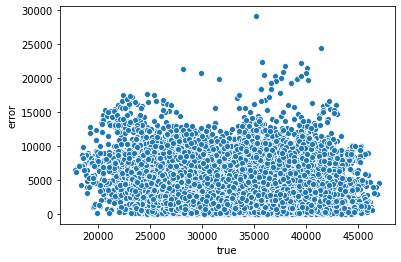

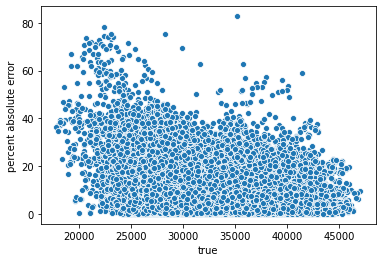

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1146: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


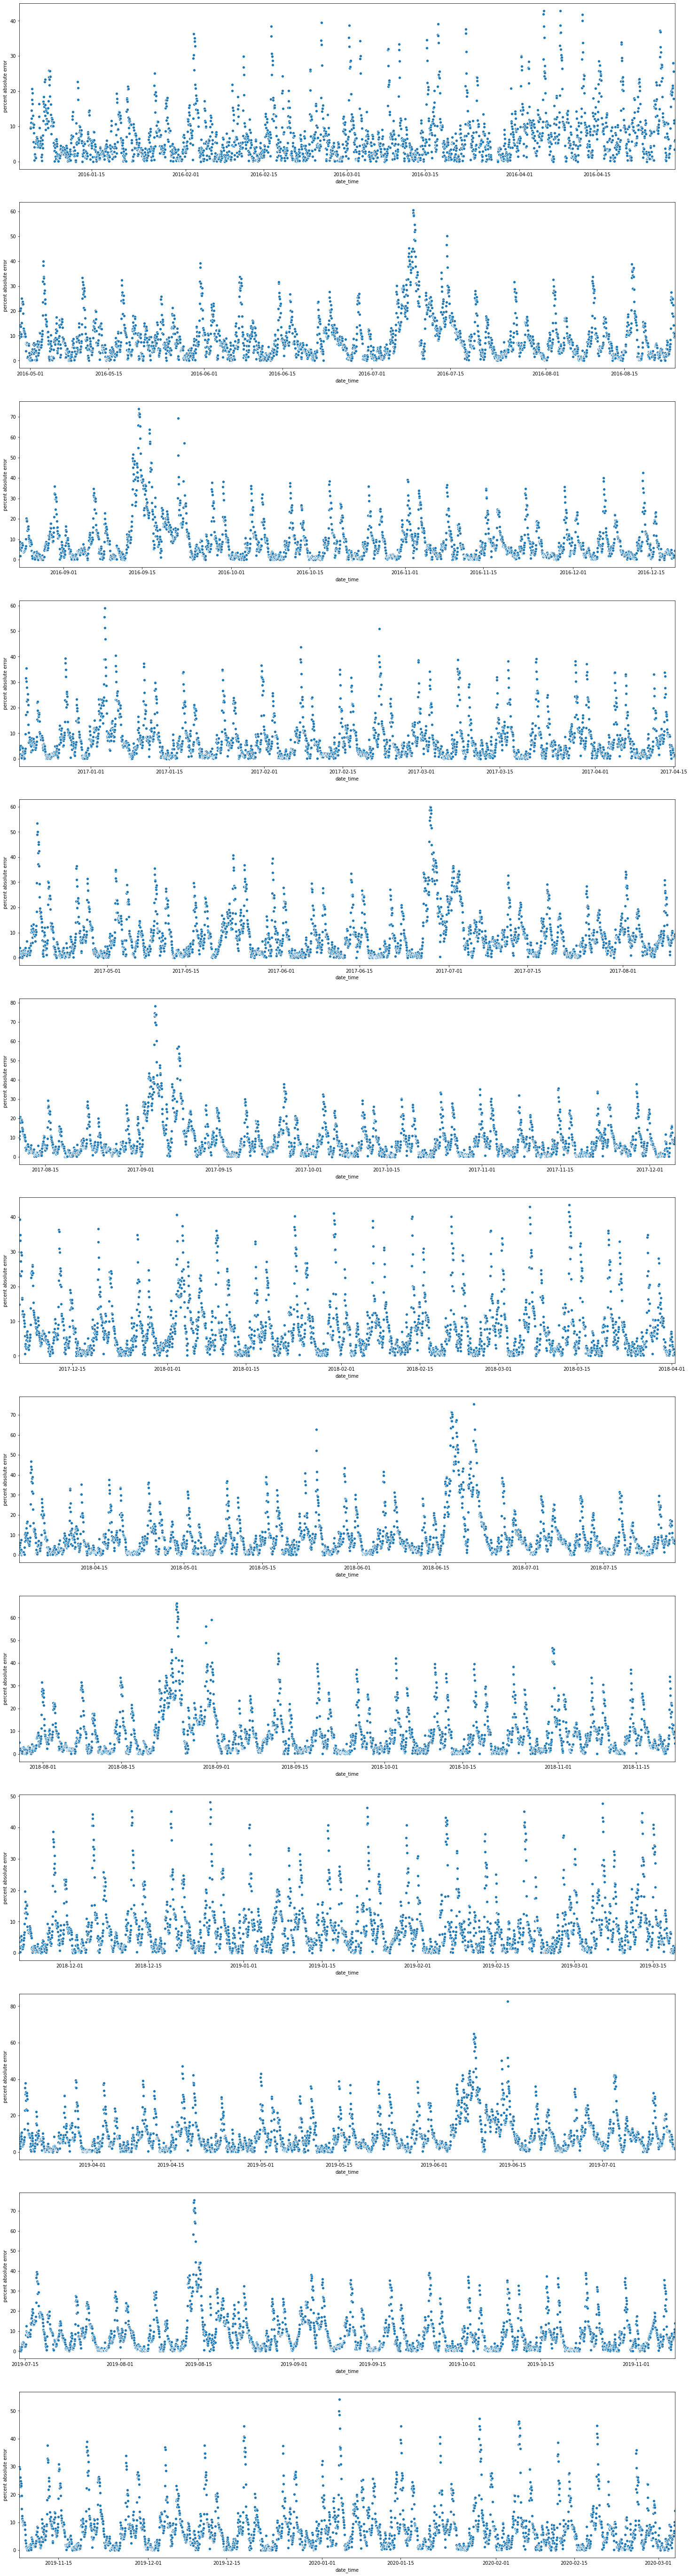

('enh_HW_foreach_hour',
 3823.2939187063193,
 0.12199042685015718,
 2705.8267471272175,
 8.531507964754685,
 8.24468114887016,
                  Datetime    Errors
 0     2016-01-02 00:00:00       NaN
 1     2016-01-02 01:00:00       NaN
 2     2016-01-02 02:00:00       NaN
 3     2016-01-02 03:00:00       NaN
 4     2016-01-02 04:00:00       NaN
 ...                   ...       ...
 36571                 NaT  7.237326
 36572                 NaT  7.838873
 36573                 NaT  7.693939
 36574                 NaT  7.678751
 36575                 NaT  7.097501
 
 [36576 rows x 2 columns])

In [384]:
predicted_values=[[]]
pred_list=[]
#consumption_df['HW_predictions']=5
for hour in np.unique(consumption_df["Hour"]):
  Exp=ExponentialSmoothing(consumption_df.loc[consumption_df['Hour'] == hour]["Consumption"], seasonal_periods=7, trend='add', seasonal='add').fit(use_boxcox=True)
  #df=pd.DataFrame(Exp.fittedvalues)
  predicted_values.append(Exp.fittedvalues)
  #pred_df=pd.DataFrame(list(zip(consumption_df.loc[consumption_df['Hour'] == hour]["Consumption"],Exp.fittedvalues)), columns =['real', 'pred']) 
  #consumption_df.loc[consumption_df['Hour'] == hour]['HW_predictions']=5
  #Exp.fittedvalues
  #MAPEs.append(eval_function("HW_ExpoSth",pred_df["real"],pred_df["pred"])[3])
#cons_lagged_exp=cons_lagged.dropna()
#np.mean(MAPEs)
#consumption_df.iloc[100]
predicted_values=pd.DataFrame(predicted_values)
predicted_values=predicted_values.drop(predicted_values.index[0])
for column in predicted_values.columns: 
     pred_list=pred_list+predicted_values[column].tolist()
consumption_df['HW_predictions']=pred_list
consumption_df['HW_predictions']=consumption_df['HW_predictions'].shift(48)
eval_function("HW_foreach_hour",consumption_df[consumption_df.index>47].dropna()["Consumption"],consumption_df[consumption_df.index>47].dropna()['HW_predictions'])
enhanced_eval_function("enh_HW_foreach_hour",consumption_df[consumption_df.index>47].dropna()["Consumption"],consumption_df[consumption_df.index>47].dropna()['HW_predictions'],consumption_df[consumption_df.index>47].dropna()[consumption_df.columns.difference(["Consumption"])])

In [0]:
enhanced_eval_function.er

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was pro

RMSE:  3453.7995046529013
MAE:  2462.134788652181
MAPE:  7.615167459140702
RMSE:  3453.7995046529013
RMSLE:  0.10665585748390416
MAE:  2462.134788652181
MAPE:  7.615167459140702


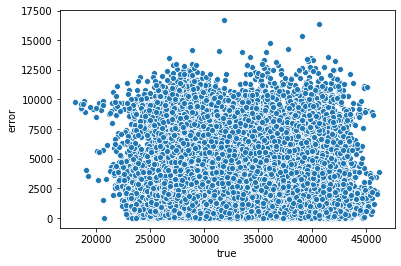

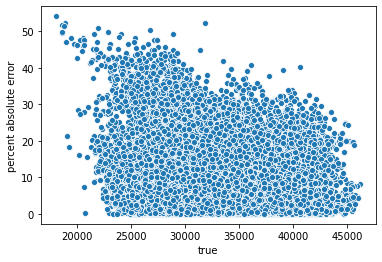

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1146: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


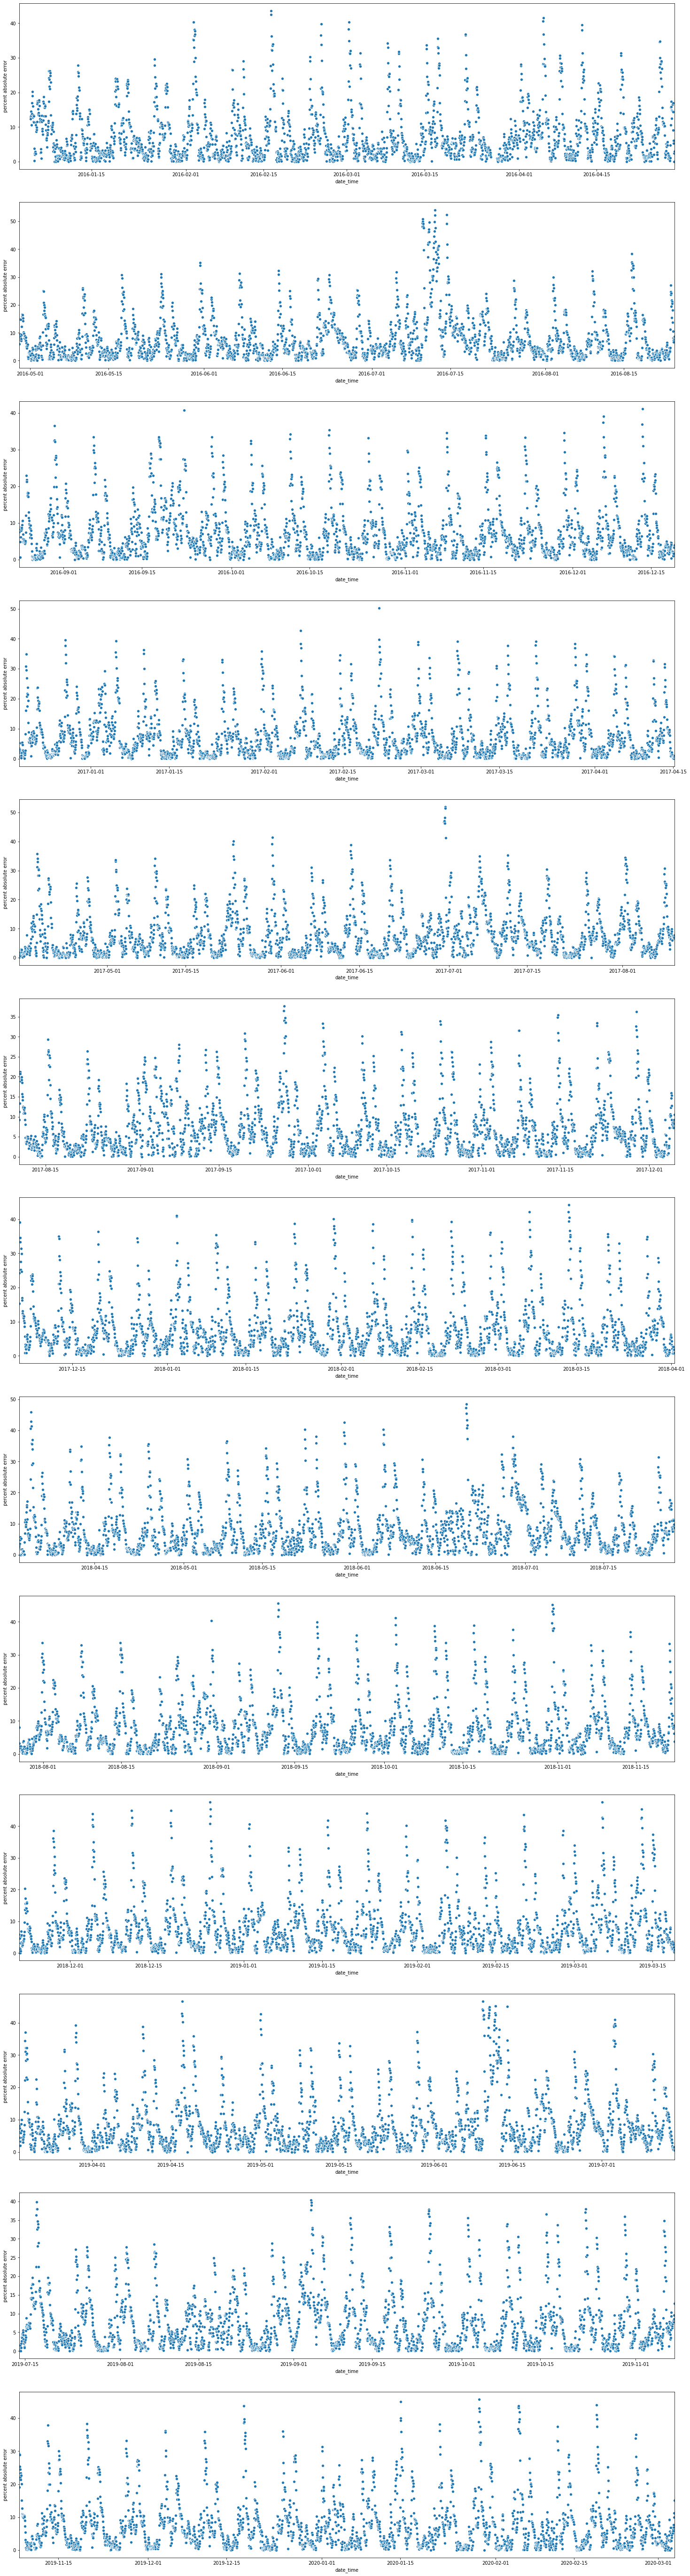

('enh_HW_foreach_hour',
 3453.7995046529013,
 0.10665585748390416,
 2462.134788652181,
 7.615167459140702)

In [375]:
shutil.copy("drive/My Drive/RealTimeConsumption_unholidayized.csv","./")
unholidayized=pd.read_csv("RealTimeConsumption_unholidayized.csv",encoding='latin-1')
consumption_df['unholidayized']=unholidayized['Consumption']
predicted_values2=[[]]
pred_list2=[]
for hour in np.unique(consumption_df["Hour"]):
  Exp=ExponentialSmoothing(consumption_df.loc[consumption_df['Hour'] == hour]["unholidayized"], seasonal_periods=7, trend='add', seasonal='add').fit(use_boxcox=True)
  predicted_values2.append(Exp.fittedvalues)
predicted_values2=pd.DataFrame(predicted_values2)
predicted_values2=predicted_values2.drop(predicted_values2.index[0])
for column in predicted_values2.columns: 
     pred_list2=pred_list2+predicted_values2[column].tolist()
consumption_df['HW_unholidayized_predictions']=pred_list2
consumption_df['HW_unholidayized_predictions']=consumption_df['HW_unholidayized_predictions'].shift(48)
eval_function("HW_unhol",consumption_df[consumption_df.index>47].dropna()["unholidayized"],consumption_df[consumption_df.index>47].dropna()['HW_unholidayized_predictions'])
enhanced_eval_function("enh_HW_foreach_hour",consumption_df[consumption_df.index>47].dropna()["unholidayized"],consumption_df[consumption_df.index>47].dropna()['HW_unholidayized_predictions'],consumption_df[consumption_df.index>47].dropna()[consumption_df.columns.difference(["unholidayized"])])

#HW Including Special Days by Regression Coefficients


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%matplotlib inline
from tqdm import tqdm_notebook as tqdm

In [388]:
special_days_path="drive/My Drive/ozel_gunler/*"
special_day_df=pd.DataFrame()
exception=[]
for i in tqdm(glob.glob(special_days_path)):  
    a=pd.read_csv(i)
    try:
        a["special_day"]=np.full(len(a),a.columns[0])
        a.columns=["date","special_day"]
        special_day_df=pd.concat([special_day_df, a])
    except ValueError:
        exception.append(i)
        pass

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [0]:
special_day_df["is"]=np.ones(len(special_day_df))
special_day_df=pd.pivot_table(special_day_df,index="date",columns="special_day").fillna(0).astype(int)
special_day_df.columns=['_'.join(i) for i in special_day_df.columns]
#special_day_df
special_day_df=special_day_df.reset_index()

In [0]:
cons_lagged=consumption_df.copy()
cons_lagged["Consumption_2_lag"]=cons_lagged["Consumption"].shift(24*2)
cons_lagged["Consumption_7_lag"]=cons_lagged["Consumption"].shift(24*7)
cons_lagged["Hour"]=cons_lagged["Hour"].apply(lambda x:x.split(":")[0]).astype(int)
cons_lagged["Day"]=cons_lagged["Date"].apply(lambda x:x.split(".")[0]).astype(int)
cons_lagged["Month"]=cons_lagged["Date"].apply(lambda x:x.split(".")[1]).astype(int)
cons_lagged["weekday"]=pd.to_datetime(cons_lagged["Date"]).apply(lambda x: x.weekday()).astype(int)
special_day_df["date"]=special_day_df["date"].apply(lambda x:'.'.join(list(reversed(x.split("-")))))
#special_day_df["date"].dtype
cons_lagged=pd.merge(cons_lagged,special_day_df,left_on="Date",right_on="date",how="left").drop(columns="date").fillna(0)
#from sklearn.preprocessing import OneHotEncoder
#from scipy.sparse import hstack
#cat_features=["Hour","Day","Month","weekday"]
#linear_enc=OneHotEncoder()
#one_hot_encoded=linear_enc.fit_transform(cons_lagged[cat_features]).toarray()
#normal_feats=cons_lagged.columns.difference(cat_features).tolist()
#cons_lagged=np.hstack([cons_lagged[normal_feats],one_hot_encoded])
#cons_lagged=pd.DataFrame(cons_lagged,columns=normal_feats+np.concatenate([[cat_features[i]+"_"+str(j) for j in cats_]for i,cats_ in enumerate(linear_enc.categories_)]).tolist())
cons_lagged=cons_lagged.dropna()
cons_lagged.loc[cons_lagged['is_arife']==1]
#cons_lagged.iloc[46:55]

In [0]:
cons_lagged_unmodif=cons_lagged.copy()
cons_lagged=cons_lagged.iloc[48:,]
train_df=cons_lagged.loc[cons_lagged["Datetime"]<=pd.to_datetime("2019-03-03 23:00",format="%Y-%m-%d %H:%M")]
valid_df=cons_lagged.loc[cons_lagged["Datetime"]>pd.to_datetime("2019-03-03 23:00",format="%Y-%m-%d %H:%M")]
from sklearn.linear_model import LinearRegression
cons_lagged=cons_lagged.dropna()
cols=train_df.columns.difference(["Date","Consumption","Datetime"]).values
model=LinearRegression()
model.fit(train_df[cols].values,train_df["Consumption"].values.reshape(-1, 1))
sp_days_index=[i for i,col in enumerate(train_df[cols].columns) if col.startswith("is_")]
cons_lagged=pd.merge(consumption_df,special_day_df,left_on="Date",right_on="date",how="left").drop(columns="date").fillna(0)
cons_lagged.loc[cons_lagged['is_arife']==1]


In [392]:
special_days_effect_dict=dict(zip(train_df[cols].columns[sp_days_index].tolist(),model.coef_[0][sp_days_index].tolist()))
#for key_ in special_days_effect_dict.keys():
#    cons_lagged[key_]=cons_lagged[key_]*special_days_effect_dict[key_]
#cons_lagged["Consumption"]=cons_lagged["Consumption"]-cons_lagged[list(special_days_effect_dict.keys())].sum(axis=1)

special_clmn=[i for i,col in enumerate(cons_lagged.columns) if col.startswith("is_")]
cons_lagged.loc[cons_lagged['is_arife']==1]

#cons_lagged.ix[:,107]
#sp_days_index
#cons_lagged.isnull().sum()

Date   Hour  ...  is_yilbasioncesi is_zaferbayrami
4440   04.07.2016  00:00  ...                 0               0
4441   04.07.2016  01:00  ...                 0               0
4442   04.07.2016  02:00  ...                 0               0
4443   04.07.2016  03:00  ...                 0               0
4444   04.07.2016  04:00  ...                 0               0
...           ...    ...  ...               ...             ...
31627  10.08.2019  19:00  ...                 0               0
31628  10.08.2019  20:00  ...                 0               0
31629  10.08.2019  21:00  ...                 0               0
31630  10.08.2019  22:00  ...                 0               0
31631  10.08.2019  23:00  ...                 0               0

[192 rows x 46 columns]

In [393]:
special_days_effect_dict
#cons_lagged.loc[cons_lagged['is_arife']==1]


{'is_annelergunu': -897.2666870006624,
 'is_arife': 2854.710643474532,
 'is_babalargunu': 1039.7097437839677,
 'is_cocukbayrami': 663.9488426947206,
 'is_cumhuriyet': 194.00404628818694,
 'is_elections': -2906.554455676325,
 'is_examination': -262.4051526548626,
 'is_genclikbayrami': 333.7630616438635,
 'is_holiday': -4756.2981307851105,
 'is_iscibayrami': 357.12222209919724,
 'is_kadinlargunu': -313.010923166019,
 'is_kandil': -100.49971943546082,
 'is_kurbanbayrami': -2309.6714625415075,
 'is_kurbanbayramilkgun': -3270.7913582797883,
 'is_kurbanoncesigunler': -1245.404356338601,
 'is_onbestemmuz': 1013.1578887028619,
 'is_outlierdays': 348.5241908661661,
 'is_ramazanbayrami': -4557.726958432495,
 'is_ramazanbayramilkgun': -1909.5083942894537,
 'is_ramazanbayramisonrasi': 3951.8151173725055,
 'is_ramazangunler': -171.35867354232002,
 'is_ramazanilkgun': 116.75644025975008,
 'is_ramazanoncesigunler': -199.08773425565175,
 'is_school_days': -193.25695039087802,
 'is_school_end': 214.557

In [0]:
cons_lagged.loc[cons_lagged['is_arife']==1]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


RMSE:  3863.9442884009404
MAE:  2807.644739621093
MAPE:  8.629882537837407
RMSE:  3863.9442884009404
RMSLE:  0.12528843040937404
MAE:  2807.644739621093
MAPE:  8.629882537837407
GMAPE:  8.422080301035052


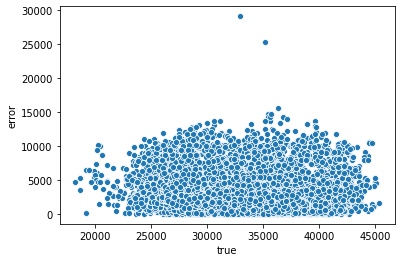

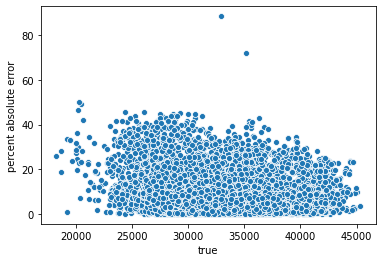

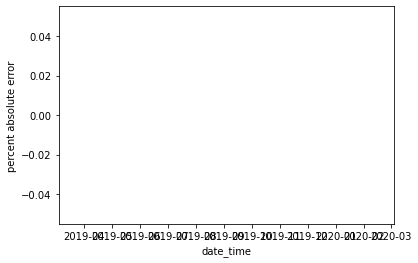

('HW_modified_by_regression',
 3863.9442884009404,
 0.12528843040937404,
 2807.644739621093,
 8.629882537837407,
 8.422080301035052,
                  Datetime    Errors
 0     2019-03-04 00:00:00       NaN
 1     2019-03-04 01:00:00       NaN
 2     2019-03-04 02:00:00       NaN
 3     2019-03-04 03:00:00       NaN
 4     2019-03-04 04:00:00       NaN
 ...                   ...       ...
 36571                 NaT  6.727908
 36572                 NaT  7.324254
 36573                 NaT  7.165650
 36574                 NaT  7.133357
 36575                 NaT  6.526191
 
 [17568 rows x 2 columns])

In [422]:
#cons_lagged['HW_predictions']=ExponentialSmoothing(consumption_df["Consumption"], seasonal_periods=24, trend='add', seasonal='add').fit(use_boxcox=True).fittedvalues
cons_lagged_exp=cons_lagged.copy()
#cons_lagged_exp['modified_pred_by_regression_coeff']=cons_lagged_exp['HW_predictions']+(cons_lagged_exp.ix[:,special_clmn]*model.coef_[0][sp_days_index]).sum(axis=1)
cons_lagged_exp['modified_pred_by_regression_coeff']=cons_lagged_exp['HW_predictions']+(cons_lagged_exp.ix[:,special_clmn].dot(model.coef_[0][sp_days_index]))
cons_lagged_exp_test=cons_lagged_exp.loc[cons_lagged_exp["Datetime"]>pd.to_datetime("2019-03-03 23:00:00")]
cons_lagged_exp_train=cons_lagged_exp.loc[cons_lagged_exp["Datetime"]<=pd.to_datetime("2019-03-03 23:00:00")]
exp_eval_df.append(eval_function("HW_modified_by_regression",cons_lagged_exp_test["Consumption"],cons_lagged_exp_test['modified_pred_by_regression_coeff']))
enhanced_eval_function("HW_modified_by_regression",cons_lagged_exp_test["Consumption"],cons_lagged_exp_test['modified_pred_by_regression_coeff'],cons_lagged_exp_test[cons_lagged_exp_test.columns.difference(["Consumption"])])
#cons_lagged_exp_train.loc[cons_lagged_exp_train['is_arife']==1]#cons_lagged_exp.loc[cons_lagged_exp['is_arife']==1]
#cons_lagged.loc[cons_lagged['is_arife']==1]
#cons_lagged['modified_pred_by_regression_coeff'].isnull().sum()#,cons_lagged['modified_pred_by_regression_coeff']
#cons_lagged_exp.ix[:,special_clmn]*
#cons_lagged_exp.ix[:,special_clmn].dot(model.coef_[0][sp_days_index])

In [0]:
#np.count_nonzero((cons_lagged_exp.ix[:,special_clmn]*model.coef_[0][sp_days_index]).sum(axis=1))
cons_lagged_exp_test

#HW on Unholidayized Data and Modified by Regression Coeff

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


RMSE:  3598.8685349396465
MAE:  2581.3558454712916
MAPE:  7.957909717630056
RMSE:  3598.8685349396465
RMSLE:  0.11117230653330931
MAE:  2581.3558454712916
MAPE:  7.957909717630056


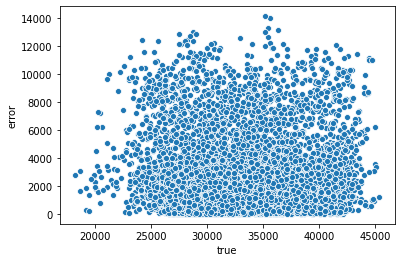

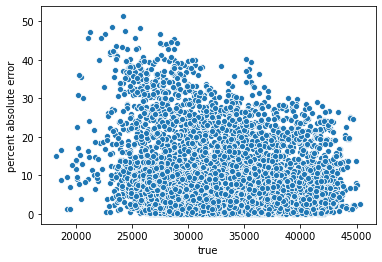

('HW_unhol_reg',
 3598.8685349396465,
 0.11117230653330931,
 2581.3558454712916,
 7.957909717630056,
 7.743282442150936,
                  Datetime    Errors
 0     2019-03-04 00:00:00       NaN
 1     2019-03-04 01:00:00       NaN
 2     2019-03-04 02:00:00       NaN
 3     2019-03-04 03:00:00       NaN
 4     2019-03-04 04:00:00       NaN
 ...                   ...       ...
 36571                 NaT  7.157746
 36572                 NaT  6.996253
 36573                 NaT  6.724742
 36574                 NaT  6.571020
 36575                 NaT  5.947784
 
 [17568 rows x 2 columns])

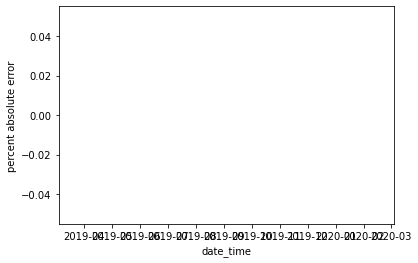

In [408]:
cons_lagged_exp['HW_unhol_reg']=cons_lagged_exp['HW_unholidayized_predictions']+cons_lagged_exp.ix[:,special_clmn].dot(model.coef_[0][sp_days_index])
cons_lagged_exp_test=cons_lagged_exp.loc[cons_lagged_exp["Datetime"]>pd.to_datetime("2019-03-03 23:00:00")]
cons_lagged_exp_train=cons_lagged_exp.loc[cons_lagged_exp["Datetime"]<=pd.to_datetime("2019-03-03 23:00:00")]
eval_function("HW_unhol_reg",cons_lagged_exp_test.dropna()["Consumption"],cons_lagged_exp_test.dropna()['HW_unhol_reg'])
enhanced_eval_function("HW_unhol_reg",cons_lagged_exp_test.dropna()["Consumption"],cons_lagged_exp_test.dropna()['HW_unhol_reg'],cons_lagged_exp_test.dropna()[cons_lagged_exp_test.columns.difference(["Consumption"])])



#HW Including Special Days as Error Factor by the Previous Years 

ERROR! Session/line number was not unique in database. History logging moved to new session 79
RMSE:  4569639735395117.0
MAE:  1253339460992412.8
MAPE:  3664354502026.199
RMSE:  4569639735395117.0
RMSLE:  7.670773982724367
MAE:  1253339460992412.8
MAPE:  3664354502026.199
GMAPE:  3759637191975.592


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]

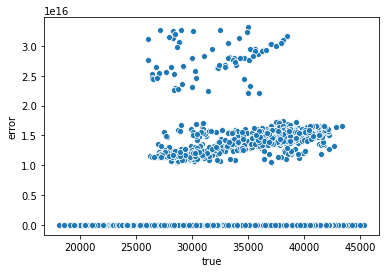

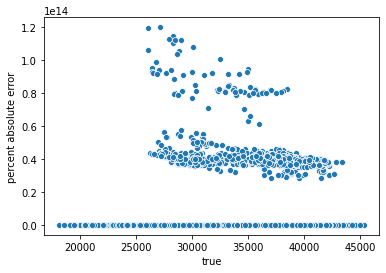

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/usr/local/lib/python3.6/dist-packages/pa

RMSE:  3783.7624132817996
MAE:  2746.781923089172
MAPE:  8.397948888342198
RMSE:  3783.7624132817996
RMSLE:  0.16216186467965168
MAE:  2746.781923089172
MAPE:  8.397948888342198
GMAPE:  8.239510362272721


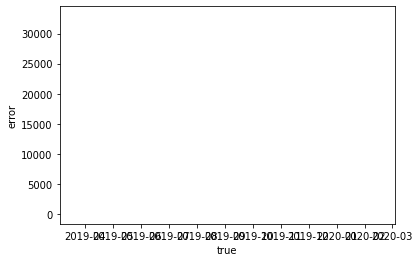

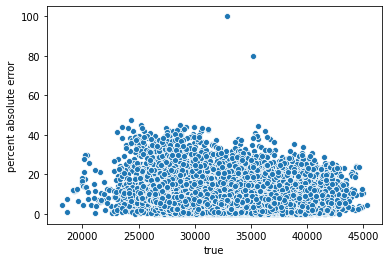

('HW_modified_by_error',
 3783.7624132817996,
 0.16216186467965168,
 2746.781923089172,
 8.397948888342198,
 8.239510362272721,
                  Datetime    Errors
 0     2019-03-04 00:00:00       NaN
 1     2019-03-04 01:00:00       NaN
 2     2019-03-04 02:00:00       NaN
 3     2019-03-04 03:00:00       NaN
 4     2019-03-04 04:00:00       NaN
 ...                   ...       ...
 36571                 NaT  7.291599
 36572                 NaT  7.892794
 36573                 NaT  7.747944
 36574                 NaT  7.732765
 36575                 NaT  7.151855
 
 [17568 rows x 2 columns])

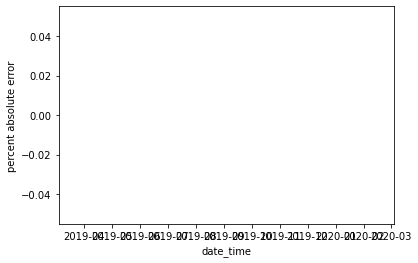

In [413]:
cons_lagged_exp["HW_percent_errors"]=(cons_lagged_exp['HW_predictions']-cons_lagged_exp['Consumption'])/cons_lagged_exp['Consumption']
cons_lagged_exp_test=cons_lagged_exp.loc[cons_lagged_exp["Datetime"]>pd.to_datetime("2019-03-03 23:00:00")]
cons_lagged_exp_train=cons_lagged_exp.loc[cons_lagged_exp["Datetime"]<=pd.to_datetime("2019-03-03 23:00:00")]
cons_lagged_exp_train=cons_lagged_exp_train.drop(cons_lagged_exp_train.index[0:47])
#model=LinearRegression()
#model.fit(train_df[cols].values,train_df["Consumption"].values.reshape(-1, 1))
#cols=train_df.columns.difference(["Date","Consumption","Datetime"]).values
#cons_lagged_exp["HW_error"]
#Ex=ExponentialSmoothing(train_df["Consumption"], seasonal_periods=24, trend='add', seasonal='add').fit(use_boxcox=True)
#scaled_holiday_errors=(Ex.fittedvalues-train_df.loc[consumption_df["Datetime"]<["Consumption"])/train_df["Consumption"]
model_by_error=LinearRegression(fit_intercept=False)
model_by_error.fit(cons_lagged_exp_train.ix[:,special_clmn].values,cons_lagged_exp_train["HW_percent_errors"].values.reshape(-1, 1))
cons_lagged_exp_test['modified_by_prev_error']=cons_lagged_exp_test['HW_predictions']*(1-(cons_lagged_exp_test.ix[:,special_clmn].dot(model_by_error.coef_[0])))
exp_eval_df.append(eval_function("HW_modified_by_error",cons_lagged_exp_test["Consumption"],cons_lagged_exp_test['modified_by_prev_error']))
enhanced_eval_function("HW_modified_by_error",cons_lagged_exp_test["Consumption"],cons_lagged_exp_test['modified_by_prev_error'],cons_lagged_exp_test[cons_lagged_exp_test.columns.difference(["Consumption"])])
cons_lagged_exp_test["HW_percent_errors"]
model_by_error.coef_[0]
from sklearn.linear_model import Ridge
model_by_error_ridge=Ridge(alpha=0.01,fit_intercept=False)
model_by_error_ridge.fit(cons_lagged_exp_train.ix[:,special_clmn].values,cons_lagged_exp_train["HW_percent_errors"].values.reshape(-1, 1))
model_by_error_ridge.coef_[0]
cons_lagged_exp_test['modified_by_prev_error']=cons_lagged_exp_test['HW_predictions']*(1-(cons_lagged_exp_test.ix[:,special_clmn].dot(model_by_error_ridge.coef_[0])))
exp_eval_df.append(eval_function("HW_modified_by_error",cons_lagged_exp_test["Consumption"],cons_lagged_exp_test['modified_by_prev_error']))
enhanced_eval_function("HW_modified_by_error",cons_lagged_exp_test["Consumption"],cons_lagged_exp_test['modified_by_prev_error'],cons_lagged_exp_test[cons_lagged_exp_test.columns.difference(["Consumption"])])

#cons_lagged_exp_test.loc[cons_lagged_exp_test['is_arife']==1]
#(cons_lagged_exp_test.ix[:,special_clmn]*model_by_error.coef_[0]).max(axis=1)
#cons_lagged_exp_test=cons_lagged_exp.loc[cons_lagged_exp["Datetime"]>pd.to_datetime("2019-03-03 23:00:00")]model_by_error.coef_
#cons_lagged_exp.ix[:,special_clmn]
#cons_lagged_exp_test.loc[cons_lagged_exp_test['is_arife']==1]

In [411]:
model_by_error.coef_[0]

array([ 1.76789025e-01, -3.01692711e-02,  6.72728885e-02, -2.82749097e+11,
       -2.82749097e+11,  3.18711910e-01,  1.19177624e-01, -2.82749097e+11,
        4.74950361e+10, -2.82749097e+11, -2.83816259e-02,  3.17857035e-02,
       -4.74950361e+10,  2.31713800e-01,  3.16897370e-02, -2.82749097e+11,
        2.55424570e-02, -4.74950361e+10,  9.20979331e-02, -1.47339312e-01,
       -3.44863289e-03,  8.06674609e-03, -2.56259138e-03, -1.42040551e-03,
        3.61466617e-02, -5.32614654e-02,  3.97861648e+11, -8.66943231e+11,
       -1.65349349e-02,  2.35254061e+11, -1.42057596e+10,  8.66943231e+11,
        1.10005563e-02,  1.96780348e-01,  4.69081583e+11,  0.00000000e+00,
       -2.82749097e+11,  1.66730419e-02, -2.82749097e+11])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/

ERROR! Session/line number was not unique in database. History logging moved to new session 80
RMSE:  3800.1229732867864
MAE:  2741.55195005892
MAPE:  8.400398625700108
RMSE:  3800.1229732867864
RMSLE:  0.16259826723184428
MAE:  2741.55195005892
MAPE:  8.400398625700108
GMAPE:  8.223822033827371


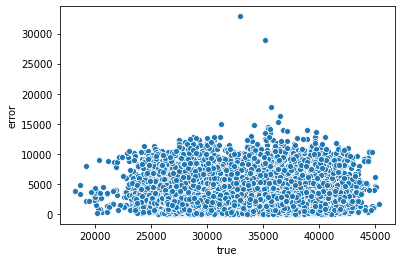

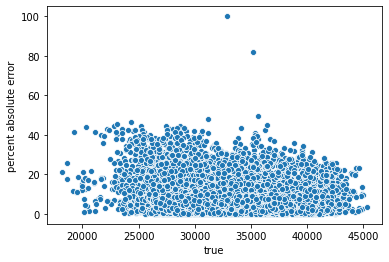

('HW_modified_by_error2',
 3800.1229732867864,
 0.16259826723184428,
 2741.55195005892,
 8.400398625700108,
 8.223822033827371,
                  Datetime    Errors
 0     2019-03-04 00:00:00       NaN
 1     2019-03-04 01:00:00       NaN
 2     2019-03-04 02:00:00       NaN
 3     2019-03-04 03:00:00       NaN
 4     2019-03-04 04:00:00       NaN
 ...                   ...       ...
 36571                 NaT  7.338034
 36572                 NaT  7.938928
 36573                 NaT  7.794151
 36574                 NaT  7.778979
 36575                 NaT  7.198361
 
 [17568 rows x 2 columns])

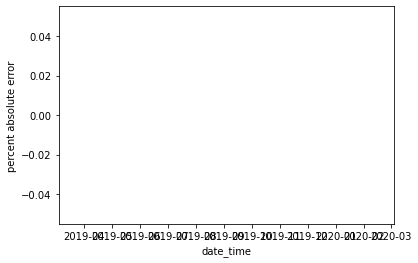

In [414]:
error_eff=[]

for co in cons_lagged_exp_train.ix[:,special_clmn].columns:
  
     error_eff+=[np.nanmean(cons_lagged_exp_train.loc[cons_lagged_exp_train[co]==1]["HW_percent_errors"]/cons_lagged_exp_train.loc[cons_lagged_exp_train[co]==1].ix[:,special_clmn].sum(axis=1),axis=0)]
np.isnan(error_eff)
error_eff[30]=0
error_eff[35]=0
np.isnan(error_eff)
#error_eff[1,2]

#error_eff[np.isnan(error_eff)]
cons_lagged_exp_test['modified_by_prev_error2']=cons_lagged_exp_test['HW_predictions']*(1-(cons_lagged_exp_test.ix[:,special_clmn].dot(error_eff)))#.mean(axis=1))
exp_eval_df.append(eval_function("HW_modified_by_error2",cons_lagged_exp_test["Consumption"],cons_lagged_exp_test['modified_by_prev_error2']))
#cons_lagged_exp_train.loc[cons_lagged_exp_train['is_arife']==1]["HW_percent_errors"]
enhanced_eval_function("HW_modified_by_error2",cons_lagged_exp_test["Consumption"],cons_lagged_exp_test['modified_by_prev_error2'],cons_lagged_exp_test[cons_lagged_exp_test.columns.difference(["Consumption"])])



In [0]:
np.nonzero((cons_lagged_exp_test.ix[:,special_clmn]*model_by_error.coef_[0])['is_arife'])[0]

In [0]:
#cons_lagged_exp_test['HW_predictions']*
#cons_lagged_exp_test[np.nonzero((cons_lagged_exp_test.ix[:,special_clmn]*model_by_error.coef_[0])['is_arife'])]

cons_lagged_exp_test.iloc[2184]